# Maximum Likelihood Estimation on High Order Statistics
In this notebook, we perform an analysis of time series data using the `xtremes` library. We utilize various estimators and statistical methods provided by the library to analyze and visualize the data.

The following variables are used in this notebook:

- **PWM**: A `PWM_estimators` object used for Probability Weighted Moments estimation.
- **MLE**: A `ML_estimators` object used for Maximum Likelihood estimation.


In [18]:
import xtremes as xx
import xtremes.HigherOrderStatistics as hos

In [19]:
TS = hos.TimeSeries(n=1000, modelparams=(0.5,0.1,0.1))
TS.simulate(rep=200)
TS.get_blockmaxima(block_size=10)

### Probability Weighted Moments (PWM) Estimation

In this section, we perform Probability Weighted Moments (PWM) estimation on the time series data. The `PWM_estimators` object is used for this purpose. Below are the steps involved:

1. **Initialization**:
    ```python
    PWM = hos.PWM_estimators(TS)
    ```
    We initialize the `PWM_estimators` object with the time series data `TS`.

2. **PWM Estimation**:
    ```python
    PWM.get_PWM_estimation()
    ```
    This method computes the PWM estimates for the given time series data.

3. **Statistics Calculation**:
    ```python
    PWM.get_statistics(gamma_true=0)
    ```
    This method calculates the statistics based on the PWM estimates. Here, `gamma_true` is the true value of the shape parameter used for comparison.

4. **Confidence Intervals**:
    ```python
    PWM.get_CIs()
    ```
    This method computes the confidence intervals for the PWM estimates.

5. **View Statistics**:
    ```python
    PWM.statistics
    ```
    This attribute holds the computed statistics, which can be accessed for further analysis or visualization.

In [20]:
PWM = hos.PWM_estimators(TS)
PWM.get_PWM_estimation()
PWM.get_statistics(gamma_true=0.5)
PWM.get_CIs()
PWM.statistics

{'gamma_mean': 0.47088517659996393,
 'gamma_variance': 0.01670944312254425,
 'gamma_bias': 0.029187884552301334,
 'gamma_mse': 0.01756137572718272,
 'mu_mean': 3.1883509998758033,
 'mu_variance': 0.04162170110658726,
 'sigma_mean': 1.598521986577066,
 'sigma_variance': 0.05246458660618443,
 'gamma_CI': array([0.26048308, 0.7876679 ]),
 'mu_CI': array([2.85180707, 3.67041571]),
 'sigma_CI': array([1.24809831, 2.0891756 ])}

Plotting the distribution of the optained estimators together with a symmetrical CI is as easy as:

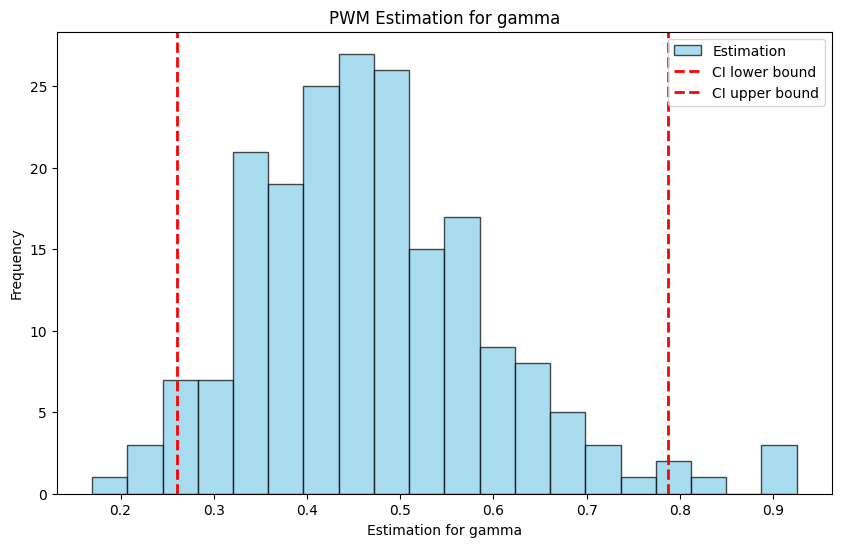

In [21]:
PWM.plot()

The same works analogously for MLE. We use the PWM estimators as an initial guess for otimization. Instead of symmetrical CIs (default) we can also plot CIs with minimal width

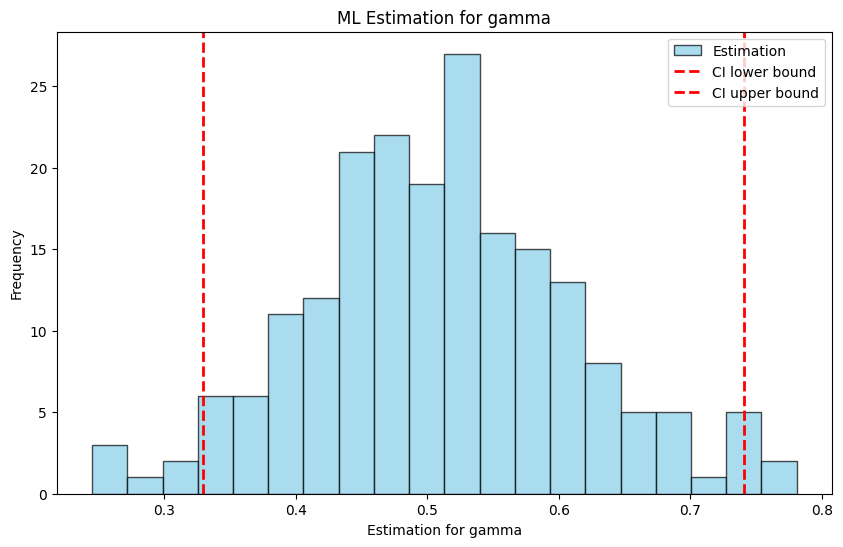

In [22]:
MLE = hos.ML_estimators(TS)
MLE.get_ML_estimation(PWM_estimators= PWM)
MLE.get_statistics(gamma_true=0)
MLE.get_CIs(method='minimal_width')  
MLE.plot()  

### Maximum Likelihood Estimation (MLE) with Frechet Distribution

In this section, we perform Maximum Likelihood Estimation (MLE) using the Frechet distribution on the time series data. The `Frechet_ML_estimators` object is used for this purpose. Below are the steps involved:

1. **Initialization**:
    ```python
    MLE = hos.Frechet_ML_estimators(TS)
    ```
    We initialize the `Frechet_ML_estimators` object with the time series data `TS`.

2. **MLE Estimation**:
    ```python
    MLE.get_ML_estimation(PWM_estimators= PWM)
    ```
    This method computes the MLE estimates for the given time series data using the PWM estimators as initial guesses for optimization.

3. **Statistics Calculation**:
    ```python
    MLE.get_statistics(alpha_true=0)
    ```
    This method calculates the statistics based on the MLE estimates. Here, `alpha_true` is the true value of the shape parameter used for comparison.

4. **Confidence Intervals**:
    ```python
    MLE.get_CIs()
    ```
    This method computes the confidence intervals for the MLE estimates.

5. **View Statistics**:
    ```python
    MLE.plot()
    ```
    This method plots the distribution of the obtained estimators together with the confidence intervals.

#### Difference between Frechet and GEV Distributions

The key difference between using the Frechet distribution and the Generalized Extreme Value (GEV) distribution lies in the type of tail behavior they model:

- **Frechet Distribution**: This distribution is used to model data with heavy tails. It is a special case of the GEV distribution with a positive shape parameter. The Frechet distribution is particularly useful for modeling extreme values that follow a power-law decay.

- **GEV Distribution**: The GEV distribution is a more general form that encompasses three types of distributions based on the shape parameter: Gumbel (light tails), Frechet (heavy tails), and Weibull (bounded tails). The GEV distribution provides more flexibility in modeling different types of extreme value behavior.

By using the `Frechet_ML_estimators`, we specifically focus on modeling heavy-tailed data, which is suitable for certain types of extreme value analysis.

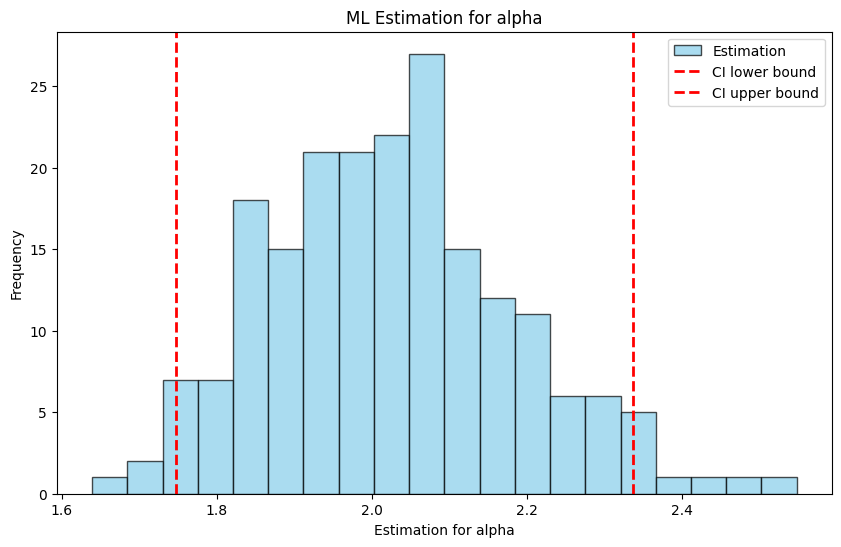

In [23]:
MLE = hos.Frechet_ML_estimators(TS)
MLE.get_ML_estimation(PWM_estimators= PWM)
MLE.get_statistics(alpha_true=0)
MLE.get_CIs()  
MLE.plot()  